<a href="https://colab.research.google.com/github/Suvraneel/fcc-machine-learning-with-python/blob/fcc-practice/practice/stockBeta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
cwd = os.getcwd()

In [22]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
s = "/content/drive/MyDrive/nse_data.csv"
df = pd.read_csv(s)
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,30-Dec-2020,13980.90,13997.00,13864.95,13981.95,380681073,24633.12
1,31-Dec-2020,13970.00,14024.85,13936.45,13981.75,452410109,26305.82
2,01-Jan-2021,13996.10,14049.85,13991.35,14018.50,258090905,15873.75
3,04-Jan-2021,14104.35,14147.95,13953.75,14132.90,494999295,28705.09
4,05-Jan-2021,14075.15,14215.60,14048.15,14199.50,492475349,30872.87


In [24]:
# Drop date variable
df = df.drop(['Date'], 1)# Dimensions of dfset
n = df.shape[0]
p = df.shape[1]# Make df a numpy array
df = df.values
df

array([[1.39809000e+04, 1.39970000e+04, 1.38649500e+04, 1.39819500e+04,
        3.80681073e+08, 2.46331200e+04],
       [1.39700000e+04, 1.40248500e+04, 1.39364500e+04, 1.39817500e+04,
        4.52410109e+08, 2.63058200e+04],
       [1.39961000e+04, 1.40498500e+04, 1.39913500e+04, 1.40185000e+04,
        2.58090905e+08, 1.58737500e+04],
       ...,
       [1.81545000e+04, 1.83104500e+04, 1.80993000e+04, 1.82684000e+04,
        3.41377869e+08, 2.97646100e+04],
       [1.82958500e+04, 1.83420500e+04, 1.81679000e+04, 1.82109500e+04,
        3.35248487e+08, 3.08237500e+04],
       [1.81876500e+04, 1.81907000e+04, 1.77994500e+04, 1.78572500e+04,
        3.74205784e+08, 3.02223400e+04]])

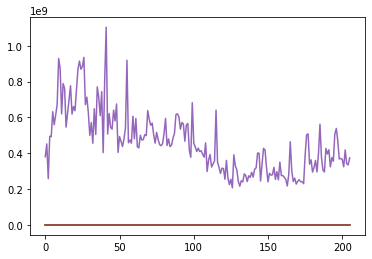

In [27]:
plt.plot(df)

In [29]:
# Training and test data
train_start = 0
train_end = int(np.floor(0.8*n))      # 80% training data
test_start = train_end
test_end = n
df_train = df[np.arange(train_start, train_end), :]
df_test = df[np.arange(test_start, test_end), :]